Objective:

Students will be able to implement Back Propagation Network algorithm for the given
dataset.

Students will be able to plot the mean square error and accuracy of Back Propagation
Network

Theory:

Backpropagation neural network is used to improve the accuracy of neural network and make them
capable of self-learning. Backpropagation means “backward propagation of errors”. Here error is
spread into the reverse direction in order to achieve better performance. Backpropagation is an
algorithm for supervised learning of artificial neural networks that uses the gradient descent method to
minimize the cost function. It searches for optimal weights that optimize the mean-squared distance
between the predicted and actual labels.

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

learning_rate = 0.1
iterations = 5000
N = y_train.size
input_size = 4
hidden_size = 2
output_size = 3

np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    y_true_one_hot = np.eye(output_size)[y_true]
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)
    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=["mse", "accuracy"])


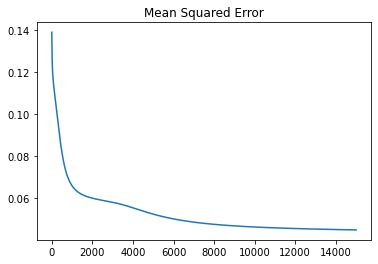

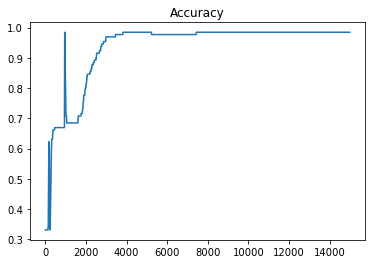

Test accuracy: 0.95


In [10]:
for itr in range(iterations):
# Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)
    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))
